# Fortnite Reload: Health Drain at Dirty Docks

- Player **starts at Salty Springs**.
- Items required to win: **Tent, Medkit, Shields**.
- If you reach **Dirty Docks** **without all items**, your health **decreases from 100 → 0** (10 steps) and you **lose**.
- If you reach **Dirty Docks** **with all items**, you **win**.

In [43]:
from text_adventure_games import games, things, viz
import time

#locations
salty = things.Location("Salty Springs", "You are at Salty Springs. A tent lies here. The storm is brewing.")
pleasant = things.Location("Pleasant Park", "You are at Pleasant Park. You see supplies nearby.")
dirty = things.Location("Dirty Docks", "You reached Dirty Docks—the final zone.")

# connecting the Places of Interest
salty.add_connection("north", pleasant)
pleasant.add_connection("south", salty)
pleasant.add_connection("east", dirty)
dirty.add_connection("west", pleasant)

#items, in lowercase
tent    = things.Item("tent",    "a tent",    "A portable tent; vital shelter.")
medkit  = things.Item("medkit",  "a medkit",  "Restores health when injured.")
shields = things.Item("shields", "some shields", "Blue shields to protect you.")

salty.add_item(tent)
pleasant.add_item(medkit)
pleasant.add_item(shields)  


# --- Player (start at Salty) ---
player = things.Character("player", "You are a Fortnite warrior.", salty)
player.set_property("health", 100)

#game, where the logic happens
class FortniteReload(games.Game):
    def __init__(self, start_at, player):
        super().__init__(start_at, player)

    def is_won(self) -> bool:
        loc = self.player.location.name
        inv = self.player.inventory
        if loc == "Dirty Docks":
            required = ["tent", "medkit", "shields"]
            if all(x in inv for x in required):
                self.parser.ok("You survived the storm! Victory Royale!")
                self.game_over = True
                return True
            else:
                self.parser.ok("You reached Dirty Docks unprepared. The storm engulfs you!")
                for hp in range(100, -10, -10):
                    if hp < 0: hp = 0
                    self.player.set_property("health", hp)
                    bar = "#" * (hp // 10) + "-" * (10 - hp // 10)
                    print(f"Health: {hp:3d} |{bar}|", flush=True)
                    if hp > 0:
                        time.sleep(1)
                self.player.set_property("is_dead", True)
                self.game_over_description = "You succumb to the storm. THE END."
                self.game_over = True
                return True
        return False

    #conditions the player cant leave salty springs if they did not pick up the tent
    def parse_and_execute(self, command: str):
        if self.player.location == salty and command.strip().lower().startswith(("go ", "north", "south", "east", "west")):
            if "tent" not in self.player.inventory:
                print("You cannot leave Salty Springs without the tent!")
                return
        return super().parse_and_execute(command)

#game loop
game = FortniteReload(salty, player)
print("Game initialized. Start location:", player.location.name)
print("Try: 'look', 'take tent', 'go north', 'take medkit', 'take shields', 'go east'")


Game initialized. Start location: Salty Springs
Try: 'look', 'take tent', 'go north', 'take medkit', 'take shields', 'go east'


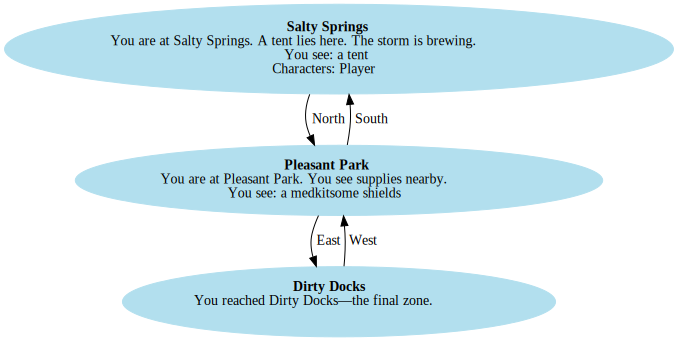

In [46]:

viz.Visualizer(game).visualize()


In [49]:
player.location = salty  # ensure starting at Salty Springs
game.game_loop()


You are at Salty Springs. A tent lies here. The storm is brewing.
Exits:
North to Pleasant Park

You see:
 * a tent


player got the tent.
You are at Pleasant Park. You see supplies nearby.
Exits:
South to Salty Springs
East to Dirty Docks

You see:
 * a medkit
 * some shields


player got the medkit.
I don't see it.
I don't see it.
player got the shields.
You reached Dirty Docks—the final zone.
Exits:
West to Pleasant Park




You survived the storm! Victory Royale!


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2d94d78e-e631-4e13-8e61-db499b01e9ea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>